# Variance and eigenvalues

We will tackle the first four steps of a principal component analysis: standardizing the data, constructing the covariance matrix, obtaining the eigenvalues and eigenvectors of the covariance matrix and finally sorting the eigenvalues by decreasing order to rank the eigenvectors.

We do that by looking at the wheat dataset that we already used previously for the Decision Tree example.

In [4]:
import pandas as pd

In [5]:
# 
# Load up the dataset into a variable called X. 
#
X = pd.read_csv("../datasets/wheat.data", index_col='id')
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


## Standardise the data
Pre-process the data: drop the NaN end extract the labels for the classification

In [6]:
X.dropna(axis=0, inplace=True)

In [7]:
labels = X.wheat_type.copy() # copy “y” values out
X.drop(['wheat_type'], axis=1, inplace=True) # drop output column 

labels = labels.map({'canadian':0, 'kama':1, 'rosa':2}) # encoding

Next we split the data into separate training and testing sets, using the usual 70-30 proportions.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=0) 

Now we will standardise the Wheat data to unit variance using SKlearn.
SKLearn has many different methods for transforming features by scaling them (this is a type of [pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)) : RobustScaler, Normalizer, MinMaxScaler, MaxAbsScaler, StandardScaler...
  
However in order to be effective at PCA, there are a few requirements that must be met, and which will drive the selection of the scaler.
PCA required that the data is standardized -- in other words its mean is equal to 0, and it has ~unit variance.
  
SKLearn's regular Normalizer doesn't zero out the mean of your data, it only clamps it, so it's inappropriate to use here (depending on the data).  
MinMaxScaler and MaxAbsScaler both fail to set a unit variance, so we won't be using them either.  
RobustScaler can work, again depending on the data (but watch for outliers).  
For these reasons we're going to use the **[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)**. 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_train_std = sc.fit_transform(X_train)

In [13]:
X_test_std = sc.transform(X_test)

## Construct the covariance matrix
After completing the mandatory preprocessing step we move to the second step: constructing the covariance matrix.  
The symmetric covariance matrix stores the pairwise covariances between the different features. 

In [14]:
import numpy as np

In [15]:
covMatrix = np.cov(X_train_std.T)

In [16]:
covMatrix

array([[ 1.0070922 ,  1.0011297 ,  0.61670387,  0.95285342,  0.97793977,
        -0.22604464,  0.87202777],
       [ 1.0011297 ,  1.0070922 ,  0.53529585,  0.97686436,  0.95131999,
        -0.21918194,  0.90047068],
       [ 0.61670387,  0.53529585,  1.0070922 ,  0.36459673,  0.76670126,
        -0.29691044,  0.22746871],
       [ 0.95285342,  0.97686436,  0.36459673,  1.0070922 ,  0.86062855,
        -0.18497896,  0.94432928],
       [ 0.97793977,  0.95131999,  0.76670126,  0.86062855,  1.0070922 ,
        -0.24239365,  0.75483918],
       [-0.22604464, -0.21918194, -0.29691044, -0.18497896, -0.24239365,
         1.0070922 , -0.0444695 ],
       [ 0.87202777,  0.90047068,  0.22746871,  0.94432928,  0.75483918,
        -0.0444695 ,  1.0070922 ]])

A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions.

The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude. In the case of the Wheat dataset, we would obtain 7 eigenvectors and eigenvalues from the 7-dimensional covariance matrix.

As we surely remember from our introductory linear algebra or calculus classes, an eigen vector is:

Since the manual computation of eigenvectors and eigenvalues is a tedious and elaborate task, we will use the linalg.eig function from NumPy to obtain the eigenpairs of the Wheat covariance matrix:

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)

In [18]:
f"Eigenvalues:  {eigenvalues}." # this works from Python 3.6, can use print otherwise

'Eigenvalues:  [5.06540460e+00 1.15619185e+00 7.36028723e-01 6.50774882e-02\n 2.04535544e-02 7.88788482e-04 5.70039211e-03].'

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). As the eigenvalues define the magnitude of the eigenvectors, we can sort the eigenvalues by decreasing magnitude and we are interested in the top  eigenvectors based on the values of their corresponding eigenvalues. 

In [19]:
tot = sum(eigenvalues)
varianceExplained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cumVarianceExp = np.cumsum(varianceExplained)

In [20]:
varianceExplained

[0.7185332477964889,
 0.16400709284053022,
 0.10440648886885688,
 0.009231313716071133,
 0.0029013593303879085,
 0.0008086069285229908,
 0.0001118905191418737]

Let's plot the variance explained ratios of the eigenvalues.

In [21]:
import matplotlib.pyplot as plt

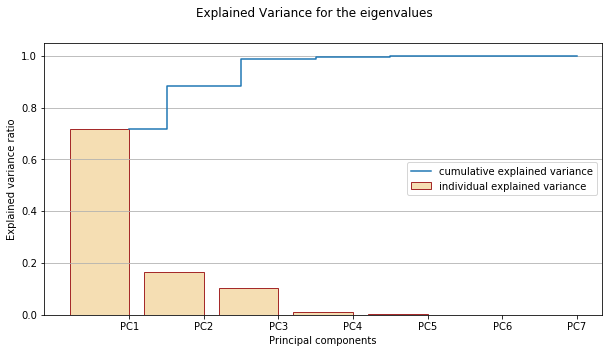

In [22]:
fig, ax = plt.subplots(figsize=(10, 5)) 
width = 0.8
tickLocations = np.arange(0,7) 
rectLocations = tickLocations-(width/2.0) 
labels = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

ax.bar(rectLocations, varianceExplained, width, color='wheat', edgecolor='brown', linewidth=1.0, align='center',label='individual explained variance')
ax.step(tickLocations, cumVarianceExp, where='mid',label='cumulative explained variance')

# --- pretty-up the plot 
ax.set_xticks(ticks= tickLocations) 
ax.set_xticklabels(labels)

fig.suptitle("Explained Variance for the eigenvalues")

ax.yaxis.grid(True)
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.legend(loc='center right'); 

The resulting plot indicates that the first principal component alone accounts for 70 percent of the variance. Also, we can see that the first two principal components combined explain almost 90 percent of the variance in the data.

After we have successfully decomposed the covariance matrix into eigenpairs, let's now proceed with the last steps to transform the Wheat dataset onto the new principal component axes. In this section, we will sort the eigenpairs by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors and use the projection matrix to transform the data onto the lower-dimensional subspace.

In [23]:
eigenpairs =[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigenpairs.sort(reverse=True)

Next, we collect the two eigenvectors that correspond to the two largest values to capture about 90 percent of the variance in this dataset. Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components has to be determined from a trade-off between computational efficiency and the performance of the classifier.

In [24]:
V = np.hstack((eigenpairs[0][1][:, np.newaxis], eigenpairs[1][1][:, np.newaxis]))
print('Matrix V:\n', V)

Matrix V:
 [[ 0.44455801  0.02566934]
 [ 0.44188066  0.08388916]
 [ 0.27591508 -0.53312904]
 [ 0.42307046  0.20911146]
 [ 0.43198716 -0.11511336]
 [-0.11816204  0.71635014]
 [ 0.38912303  0.37140397]]


We have created a 7x2-dimensional projection matrix W from the top two eigenvectors. Using the projection matrix, we can now transform a sample T onto the PCA subspace obtaining T1, a now two-dimensional sample vector consisting of two new features.

In [25]:
X_train_std[0].dot(V)

array([3.06229007, 0.67948187])

In [26]:
X_train_pca = X_train_std.dot(V)

Lastly, let's visualize the transformed Wheat training set in a two-dimensional scatterplot

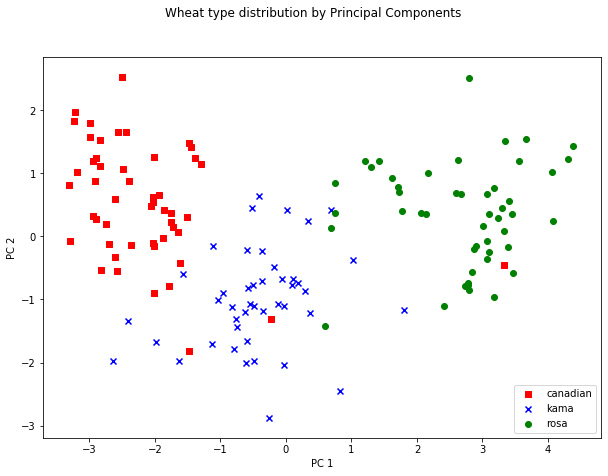

In [27]:
fig, ax = plt.subplots(figsize=(10, 7)) 

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
classes = ['canadian', 'kama', 'rosa']

for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],  c=c, label=classes[l], marker=m) 

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend(loc='lower right')

fig.suptitle("Wheat type distribution by Principal Components");

As we can see in the plot, the data is more spread along the x-axis — the first principal component — than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created in the previous subsection. Moreover, we can intuitively see that a linear classifier will likely be able to separate the classes quite well. 

# Examples of Principal Component Analysis using SKlearn

## Kidney study
Goal: reduce the dense kidney clinic study feature set to its two main components


We use a dataset to predict the chronic kidney disease, that can be found on the usual [UCI repository](http://archive.ics.uci.edu/ml):
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

 You can take a look at the [dataset webpage](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease) in the attribute info section

In [28]:
df = pd.read_csv("../Datasets/kidney_disease.csv", index_col='id') 

In [29]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


There are some NaN. Let's drop them.

In [30]:
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

There are 158 entries.  
Each one has the classification target column, plus 24 other classes: 11 numeric and 14 nominal.  
See the site page for an explanation of each class.

In [32]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# we're only labeling by color so you can see the effects of PCA

labelsCol = ['red' if i=='ckd' else 'green' for i in df.classification]

In [33]:
# Get rid of nominal columns
#

df.drop(labels=['classification'], axis=1, inplace=True)

df = pd.get_dummies(df,columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 
                                'dm', 'cad', 'appet', 'pe', 'ane'])

print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object


In [34]:
# Print out and check the dataframe's dtypes. 
#

df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')
df.pcv = pd.to_numeric(df.pcv, errors='coerce')

print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object


After adding in all the other features and properly encoding those that 
need to be, the separation between CKD and Non-CKD 
patients increases significantly: by taking many secondary features and combining them, machine
 learning is usually able to come up with more informative descriptions of
 the data.

PCA Operates based on variance. The variable with the greatest variance will dominate.  
Let's peek into the data and check the variance of every feature in the dataset.

In [35]:
df.var()

age               2.406297e+02
bp                1.248891e+02
sg                3.023865e-05
al                1.996936e+00
su                6.616141e-01
bgr               4.217182e+03
bu                2.246322e+03
sc                9.471717e+00
sod               5.609143e+01
pot               1.208501e+01
hemo              8.307100e+00
pcv               8.290402e+01
wc                9.777380e+06
rc                1.039104e+00
rbc_abnormal      1.015883e-01
rbc_normal        1.015883e-01
pc_abnormal       1.508103e-01
pc_normal         1.508103e-01
pcc_notpresent    8.127066e-02
pcc_present       8.127066e-02
ba_notpresent     7.062807e-02
ba_present        7.062807e-02
htn_no            1.699589e-01
htn_yes           1.699589e-01
dm_no             1.467387e-01
dm_yes            1.467387e-01
cad_no            6.518584e-02
cad_yes           6.518584e-02
appet_good        1.064662e-01
appet_poor        1.064662e-01
pe_no             1.112634e-01
pe_yes            1.112634e-01
ane_no  

Large variance amount: **wc, bgr, bu**

In [36]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,...,0.822785,0.177215,0.930380,0.069620,0.879747,0.120253,0.873418,0.126582,0.898734,0.101266
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,...,0.383065,0.383065,0.255315,0.255315,0.326292,0.326292,0.333562,0.333562,0.302640,0.302640
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The first thing PCA does is center the dataset about its mean by subtracting the mean from each sample. Looking at the .describe() output of the dataset, particularly the min, max, and mean readings per feature, some features will dominate the X axis (likely wc) and some the Y axis (likely bgr).

Now we use PCA from SKLearn

In [37]:
from sklearn.decomposition import PCA


In [38]:
# Run PCA on the dataset and reduce it to 2 components
#
  
pcaModel = PCA(n_components=2)
pcaModel.fit(df) # fit the model

T = pcaModel.transform(df) # T is an array of len 158 (one for each df's entry) and two components

In [39]:
T[0]

array([-1.77596096e+03, -1.26057430e+00])

In [40]:
pcaModel.explained_variance_ratio_

array([9.99309365e-01, 4.57758701e-04])

In [41]:
pcaModel.explained_variance_

array([9.77762600e+06, 4.47888665e+03])

In [42]:
pcaModel.singular_values_

array([39180.18992145,   838.56138993])

Let's plot the features with their vectors:

In [43]:
import math

def drawVectors(transformed_features, components_, columns, plt):

  num_columns = len(columns)

  # This funtion will project your *original* feature (columns)
  # onto your principal component feature-space, so that you can
  # visualize how "important" each one was in the
  # multi-dimensional scaling
  
  # Scale the principal components by the max value in
  # the transformed set belonging to that component
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])


  # Sort each column by its length. These are your *original*
  # columns, not the principal components.
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
  print ("Features by importance:\n", important_features)

  ## visualize projections

  ax = plt.axes()

  for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
    plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

  return ax

Features by importance:
 [(17924.12862704472, 'wc'), (309.72755212441524, 'bgr'), (133.4661920624122, 'bu'), (29.873170788201644, 'pcv'), (26.924712516320835, 'age'), (15.348887614206896, 'sod'), (14.728205659896712, 'bp'), (9.26958992968382, 'hemo'), (8.315782432584017, 'sc'), (4.812817492433102, 'al'), (3.854866211705058, 'pot'), (2.9506615569902213, 'rc'), (2.939116338871963, 'su'), (1.4500345016834413, 'dm_yes'), (1.4500345016834406, 'dm_no'), (1.4262548164785005, 'htn_no'), (1.4262548164785, 'htn_yes'), (1.0748414625899176, 'pc_normal'), (1.0748414625899176, 'pc_abnormal'), (0.8619132020709073, 'appet_poor'), (0.861913202070907, 'appet_good'), (0.8592833054679994, 'pe_yes'), (0.8592833054679994, 'pe_no'), (0.8504820097620381, 'rbc_abnormal'), (0.8504820097620378, 'rbc_normal'), (0.6274850804078085, 'cad_yes'), (0.6274850804078085, 'cad_no'), (0.49341600089668086, 'pcc_present'), (0.4934160008966808, 'pcc_notpresent'), (0.49150767269010703, 'ane_yes'), (0.49150767269010703, 'ane_no

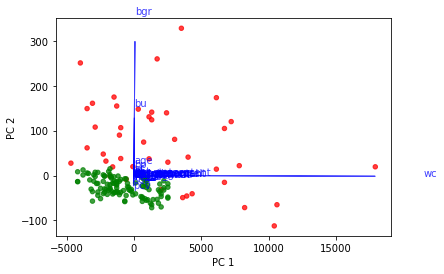

In [44]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. Therefore we convert it to DataFrame and have pandas
# do the plot.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:

ax = drawVectors(T, pcaModel.components_, df.columns.values, plt)
T = pd.DataFrame(T)
T.columns = ['PC 1', 'PC 2']
T.plot.scatter(x='PC 1', y='PC 2', marker='o', c=labelsCol, alpha=0.75, ax=ax);

As expected, the two most important features (highest variance) are bgr and wc.  
According to the labeling, red plots correspond to chronic kidney disease, and green plots are non-CKD patients.   
Looking at the scatter plot, the two classes are not completely separable: a few records are mixed together.

Now we repeat the PCA but with scaling before!

In [45]:
from sklearn import preprocessing


In [46]:
# A Note on SKLearn .transform() calls:
#
# Any time you transform your data, you lose the column header names.
# This actually makes complete sense. There are essentially two types
# of transformations,  those that change the scale of your features,
# and those that change your features entire. Changing the scale would
# be like changing centimeters to inches. Changing the features would
# be like using PCA to reduce 300 columns to 30. In either case, the
# original column's units have been altered or no longer exist, so it's
# up to you to rename your columns after ANY transformation. Due to
# this, SKLearn returns an NDArray from *transform() calls.



# ---------
# Feature scaling is the type of transformation that only changes the
# scale and not number of features, so we'll use the original dataset
# column names. However we'll keep in mind that the _units_ have been
# altered:

def scaleFeatures(usdf):
  scaled = preprocessing.StandardScaler().fit_transform(usdf)
  scaled = pd.DataFrame(scaled, columns = usdf.columns)
  print ("New Variances:\n", scaled.var())
  print ("New Describe:\n", scaled.describe())
  return scaled

In [47]:
scaled = preprocessing.StandardScaler().fit_transform(df) # returns an array
S = pd.DataFrame(scaled, columns = df.columns) # make it a data frame
print ("New Variances:\n", S.var())

New Variances:
 age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64


In [48]:
print ("New Describe:\n", S.describe())

New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   8.432074e-17  5.846238e-16 -1.304161e-15 -1.349132e-16 -2.248553e-17   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

                bgr            bu          sc           sod           pot  \
count  1.580000e+02  1.580000e+02  158.000000  1.580000e+02  1.580000e+02   
mean  -4.497106e-17  8.994212e-17    0.000000  9.893633e-16  5.621382e-17   
std    1.003180e+00  1.003180e+00    1.003

In [49]:
S.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,-0.101098,-0.363613,-2.713365,2.273474,-0.312233,-0.221549,0.072474,0.525250,-3.730148,-0.616596,...,0.464095,-0.464095,0.273551,-0.273551,-2.704772,2.704772,-2.626785,2.626785,-2.979094,2.979094
1,0.222253,1.431726,0.023092,0.853676,-0.312233,-0.947597,1.151950,1.633514,-3.328309,-0.270309,...,-2.154729,2.154729,0.273551,-0.273551,-2.704772,2.704772,0.380693,-0.380693,-2.979094,2.979094
2,0.868954,-0.363613,-1.801213,1.563575,-0.312233,3.841231,0.157139,0.166693,-1.051224,-0.126022,...,-2.154729,2.154729,0.273551,-0.273551,-2.704772,2.704772,-2.626785,2.626785,0.335673,-0.335673
3,1.192305,0.534056,-1.801213,1.563575,2.154410,0.396364,0.792125,0.623038,-1.185170,0.508838,...,-2.154729,2.154729,-3.655631,3.655631,-2.704772,2.704772,-2.626785,2.626785,0.335673,-0.335673
4,0.739614,0.534056,-0.889060,0.853676,-0.312233,0.643529,2.019764,0.557846,-0.515439,0.162550,...,-2.154729,2.154729,-3.655631,3.655631,-2.704772,2.704772,-2.626785,2.626785,-2.979094,2.979094


In [50]:
# Run PCA on your dataset and reduce it to 2 components
#
#pcaModel = PCA(copy=True, n_components=2, whiten=False)


pcaModel.fit(S)

TS = pcaModel.transform(S) # TS is an array of length 158 and two components

In [51]:
TS[0]

array([ 7.40571153, -5.4338862 ])

In [52]:
pcaModel.explained_variance_ratio_

array([0.46548191, 0.08269405])

In [53]:
pcaModel.singular_values_

array([50.00568791, 21.07682243])

Features by importance:
 [(2.969615039499333, 'ane_yes'), (2.969615039499333, 'ane_no'), (2.758875925894978, 'bgr'), (2.7155049553940604, 'dm_yes'), (2.7155049553940604, 'dm_no'), (2.6589320941392414, 'pcv'), (2.645572100109875, 'hemo'), (2.60211266284851, 'al'), (2.5934172193046927, 'htn_no'), (2.593417219304692, 'htn_yes'), (2.5767305659998674, 'su'), (2.4859440233443406, 'cad_yes'), (2.4859440233443406, 'cad_no'), (2.484132428132544, 'sc'), (2.4794711137049417, 'pc_normal'), (2.4794711137049417, 'pc_abnormal'), (2.465109416186055, 'appet_poor'), (2.465109416186054, 'appet_good'), (2.4575665060850933, 'bu'), (2.393726969612571, 'sg'), (2.388197579628534, 'rc'), (2.210578246131017, 'pe_yes'), (2.210578246131017, 'pe_no'), (2.182818062607651, 'sod'), (2.005926150817528, 'rbc_normal'), (2.005926150817528, 'rbc_abnormal'), (1.9861731688066884, 'ba_present'), (1.986173168806688, 'ba_notpresent'), (1.9842911319072, 'pcc_present'), (1.9842911319071999, 'pcc_notpresent'), (1.2846796771566376

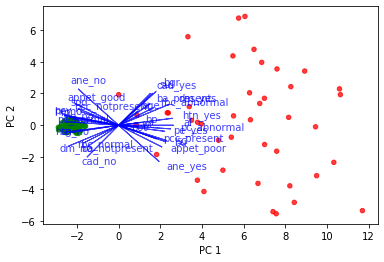

In [54]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:

ax = drawVectors(TS, pcaModel.components_, S.columns.values, plt)
TS = pd.DataFrame(TS)
TS.columns = ['PC 1', 'PC 2']
TS.plot.scatter(x='PC 1', y='PC 2', marker='o', c=labelsCol, alpha=0.75, ax=ax);

Note that scaling the features did affect their variances.  
After scaling, the green patients without chronic kidney disease are more cleanly separable from the red patients with chronic kidney disease.

## Armadillo: From 3D rendering to 2D plot  


The goal is to reduce the dimensionality of a 3D scan from three to two using PCA to cast a shadow of the data onto its two most 
important principal components. Then render the resulting 2D scatter plot.
The scan is a real life armadillo sculpture scanned using a Cyberware 3030 MS 3D scanner at Stanford University. 
The sculpture is available as part of their [3D Scanning Repository](https://graphics.stanford.edu/data/3Dscanrep/) - where the PLY file is available - and is a very dense 3D mesh consisting of 172974 vertices! 

### Read the data

Every 100 data samples, we save 1.  
If things run too slow, try increasing this number.  
If things run too fast, try decreasing it... =)

In [55]:
reduce_factor = 100


In [56]:
from plyfile import PlyData

In [57]:
# Load up the scanned armadillo
plyfile = PlyData.read('../Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### Render the Original Armadillo


In [58]:
from mpl_toolkits.mplot3d import Axes3D


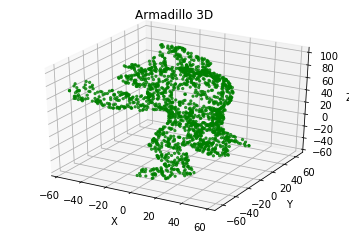

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75);

### Decompose to 2D using PCA

In [60]:
from sklearn.decomposition import PCA


In [61]:
def do_PCA(armadillo):
  #
  # import the libraries required for PCA.
  # Then, train your PCA on the armadillo dataframe. Finally,
  # drop one dimension (reduce it down to 2D) and project the
  # armadillo down to the 2D principal component feature space.
  #
  
  pca = PCA(n_components=2)
  pca.fit(armadillo)

  reducedArmadillo = pca.transform(armadillo)

  return reducedArmadillo

Time the execution of PCA 5000x  
PCA is ran 5000x in order to help decrease the potential of rogue processes altering the speed of execution.

In [62]:
import datetime


In [63]:

t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

Render the newly transformed PCA armadillo!

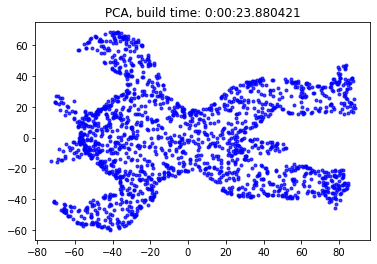

In [64]:
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)



We can run PCA also changing the solver algorithm, specifically the Randomized (truncated) method for the SVD solver.  
To find out how to use it, check out the [full docs](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [65]:
def do_RandomizedPCA(armadillo):

  pca = PCA(n_components=2, svd_solver='randomized')
  pca.fit(armadillo)

  reducedArmadillo = pca.transform(armadillo)

  return reducedArmadillo

Time the execution of randomized PCA 5000x

In [66]:
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1


Render the newly transformed RandomizedPCA armadillo!

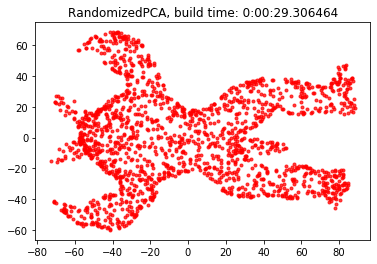

In [67]:
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)

No visual differences between the transformed PCA results and the transformed RandomizedPCA results
And was not executed faster

# Extra: Isomap

Goal: Replicate Joshua Tenenbaum's - the primary creator of the isometric feature mapping algorithm -  canonical, dimensionality reduction research experiment for visual perception.  
His original dataset from December 2000 consists of 698 samples of 4096-dimensional vectors.  
These vectors are the coded brightness values of 64x64-pixel heads that have been rendered facing various directions and lighted from many angles.  
Can be accessed here: https://web.archive.org/web/20160913051505/http://isomap.stanford.edu/datasets.html
- Applying both PCA and Isomap to the 698 raw images to derive 2D principal components and a 2D embedding of the data's intrinsic geometric structure.
- Project both onto a 2D and 3D scatter plot, with a few superimposed face images on the associated samples.

## Read the data

Note: a .MAT file is a .MATLAB file.


In [68]:
import scipy.io


In [69]:
mat = scipy.io.loadmat('../Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 4096 entries, 0 to 4095
dtypes: float64(4096)
memory usage: 21.8 MB


Pictures are rotated.  
Rotate them, so we don't have to crane our necks:

In [71]:
for i in range(num_images):
  df.loc[i,:] = df.loc[i,:].values.reshape(num_pixels, num_pixels).T.reshape(-1)

Prepare the function to plot the 2D images representation

In [72]:
import random

In [73]:
# The format is: Plot2D(T, title, x, y, num_to_plot=40):
# T is the transformed data, NDArray.
# title is the chart title
# x is the principal component you want displayed on the x-axis, Can be 0 or 1
# y is the principal component you want displayed on the y-axis, Can be 1 or 2

def Plot2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random samples (images in our case)
  # to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111)
    
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))

  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08

  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
    x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
    img = df.iloc[img_num,:].values.reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

## Reduce components using PCA

Reduce the dataframe df down to THREE components.


In [74]:
pca = PCA(n_components=3)
pca.fit(df)

T = pca.transform(df)

We plot two of the components:

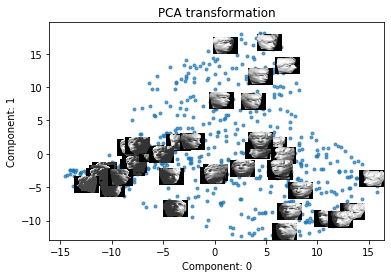

In [75]:
Plot2D(T, "PCA transformation", 0, 1, num_to_plot=40)


## Reduce components using Isomap

Again, reduce the dataframe df down to THREE components.

In [76]:
from sklearn import manifold


In [77]:
iso = manifold.Isomap(n_neighbors=8, n_components=3)
iso.fit(df)
manifold = iso.transform(df)

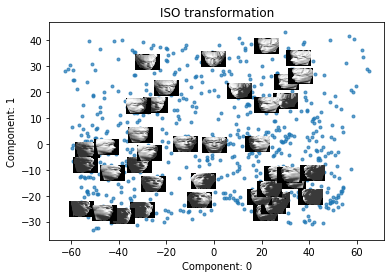

In [78]:
Plot2D(manifold, "ISO transformation", 0, 1, num_to_plot=40)


Between linear PCA and the non-linear Isomap, the latter algorithm is better able to capture the true nature of the faces dataset when reduced to two components.  

Each coordinate axis of the 3D manifold  correlate highly with one degree of freedom from the original, underlying data.  
In the isomap plot of the first two components (0 and 1), above, you can see that's the Left and Right Head Position 'degree of freedom' was encoded onto the first component (the X-axis). In other words, what varies as you move horizontally in the manifold rendering.


Alter the code to graph the second and third components (index=1 and 2) instead of the 0th and 1st, for both PCA and Isomap.


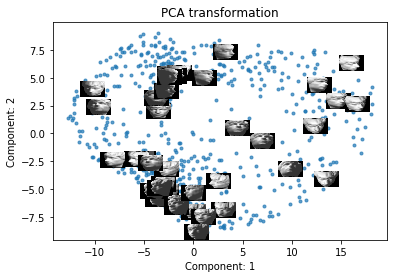

In [79]:
Plot2D(T, "PCA transformation", 1, 2, num_to_plot=40)


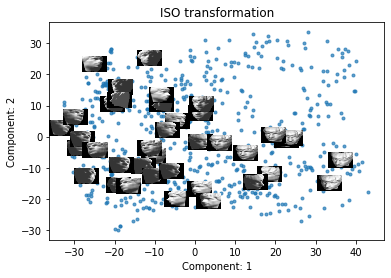

In [80]:
Plot2D(manifold, "ISO transformation", 1, 2, num_to_plot=40)


Look *closely* at the Isomap plot. Can you tell what 'degree of freedom' the X axis represents?
It's the Down and Up Head Position

## Draw the dataframes in 3D


In [81]:
def Plot3D(T, title, x, y, z):

  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')

  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  ax.set_zlabel('Component: {0}'.format(z))


  ax.scatter(T[:,x],T[:,y],T[:,z], marker='.', c='red')



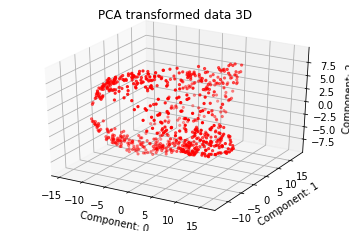

In [82]:
Plot3D(T, "PCA transformed data 3D", 0, 1, 2)

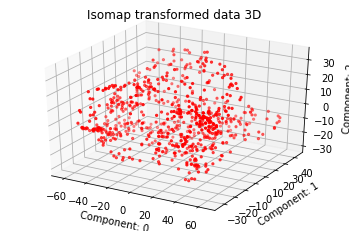

In [83]:
Plot3D(manifold, "Isomap transformed data 3D", 0, 1, 2)

A (partial) list of imported packages, thanks to [an IPython extension](https://github.com/rasbt/watermark) from the good Sebastian Raschka

In [84]:
%load_ext watermark

In [85]:
%watermark --python --iversion --packages scikit-learn

numpy  1.18.1
pandas 1.0.3
scipy  1.2.1
CPython 3.7.7
IPython 7.13.0

sklearn 0.21.3
